# Colaboratory

## Introduction



Some important links to keep open during this course – open these tabs **now**!:

- [TF documentation](https://www.tensorflow.org/api_docs/python/tf) : Use the search box (top right) to get documentation on Tensorflow's rich API.


---

Colaboratory (Colab) is a Jupyter notebook environment which allows you to work with data and code in an interactive manner. You can decide where you want to run your code:

*   Using a hosted runtime provided by Google (**default**)
*   Locally using your own machine and resources

It supports Python 3 and comes with a set of pre-installed libraries like Tensorflow and Matplotlib but also gives you the option to install more libraries on demand. The resulting notebooks can be shared in a straightforward way.

Caveats:

*   The virtual machines used for the runtimes are **ephemeral** so make sure to save your data in a persistent location like locally (downloading), in the Google Cloud Storage or Google Drive.
*   The service is free of use but the performance of default runtimes can be insufficient for your purposes.
*  You have the option to select a runtime with GPU or TPU support.
*  "Colaboratory is intended for interactive use. Long-running background computations, particularly on GPUs, may be stopped. [...] We encourage users who wish to run continuous or long-running computations through Colaboratory’s UI to use a local runtime." - See [Colaboratory FAQ](https://research.google.com/colaboratory/faq.html "Colaboratory FAQ")

**Getting started**

1.   Connect to a runtime now by clicking `connect` in the top right corner if you don't already see a green checkmark there.
2.   To get a better overview you might want to activate the *Table of contents* by clicking on the arrow on the left.

### Important shortcuts

Action | Colab Shortcut | Jupyter Shortcut
---|---|---
Executes current cell | `<CTRL-ENTER>` | `<CTRL-ENTER>`
Executes current cell and moves to next cell | `<SHIFT-ENTER>` | `S<HIFT-ENTER>`
Executes current selection | `<CTRL-SHIFT-ENTER>` | `N/A`
Insert cell above | `<CTRL-M> <A>` | `<A>`
Append cell below | `<CTRL-M> <B>` | `<B>`
Shows searchable command palette | `<CTRL-SHIFT-P>` | `<CTRL-SHIFT-P>`
Convert cell to code | `<CTRL-M> <Y>` | `<Y>`
Convert cell to Markdown | `<CTRL-M> <M>` | `<M>`
Autocomplete (on by default) | `<CTRL+SPACE>` | `<TAB>`
Goes from edit to "command" mode | `<ESC>` | `<ESC>`
Goes from "command" to edit mode | `<ENTER>` | `<ENTER>`
Show keyboard shortcuts | `<CTRL-M> <H>` | `<H>`
<p align="center"><b>Note:</b> On OS X you can use `<COMMAND>` instead of `<CTRL>`</p>

Give it a try!

In [1]:
# YOUR ACTION REQUIRED:
# Execute this cell first using <CTRL-ENTER> and then using <SHIFT-ENTER>.
# Note the difference in which cell is selected after execution.
print('Hello world!')

Hello world!


You can also only execute one single statement in a cell.

In [2]:
# YOUR ACTION REQUIRED:
# Execute only the first print statement by selecting the first line and pressing
# <CTRL-SHIFT-ENTER>.
print('Only print this line.')
print('Avoid printing this line.')

Only print this line.
Avoid printing this line.


### Importing TensorFlow

We'll be using **TensorFlow 2.3.0** in this course. This is the default, but for the time being we still need to activate it with the Colab-specific `%tensorflow_version` magic.

In [9]:
%tensorflow_version  

UsageError: Line magic function `%tensorflow_version` not found.


In [10]:
# Include basic dependencies and display the tensorflow version.
import tensorflow as tf
tf.__version__

'2.1.0'

### Running shell commands

You can run shell commands directly in Colab: simply prepend the command with a **!**.

In [11]:
# Print the current working directory and list all files in it.
!pwd
!ls

/work/hslu-deep-learning/notebooks/Block 3
'Exercises Block 3 - Training and Optimizing Neural Networks.ipynb'
'Jupyter Notebook Block 3 - Training and Optimizing Neural Networks.ipynb'
'Jupyter Notebook - Introduction Colab.ipynb'


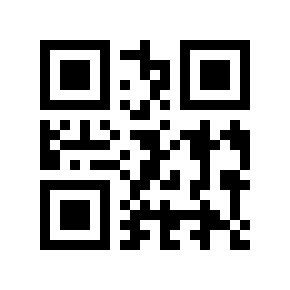

In [12]:
# Especially useful: Installs new packages.
!pip install qrcode
import qrcode
qrcode.make('Colab rocks!')

**Autocompletion and docstrings**

Jupyter shows possible completions of partially typed
commands.

Try it for yourself by displaying all available `tf.` methods that start with `one`.

In [13]:
# YOUR ACTION REQUIRED:
# Set the cursor to after tf.one and press <CTRL-SPACE>.
tf.one_hot #tf.one

<function tensorflow.python.ops.array_ops.one_hot(indices, depth, on_value=None, off_value=None, axis=None, dtype=None, name=None)>

In addition, you can also display docstrings to see the function signature and possible parameters.

In [14]:
# YOUR ACTION REQUIRED:
# Complete the command to "maximum" and then add the opening bracket "(" to see
# the function documentation.
#tf.maximum()
tf.maximum([1, 2, 3], [2, 2, 2]) 

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 2, 3], dtype=int32)>

Alternatively, you might also inspect function details with docstrings if available by appending a "?".

In [15]:
tf.maximum?

Signature: tf.maximum(x, y, name=None)
Docstring:
Returns the max of x and y (i.e. x > y ? x : y) element-wise.

*NOTE*: `math.maximum` supports broadcasting. More about broadcasting
[here](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)

Args:
  x: A `Tensor`. Must be one of the following types: `bfloat16`, `half`, `float32`, `float64`, `int32`, `int64`.
  y: A `Tensor`. Must have the same type as `x`.
  name: A name for the operation (optional).

Returns:
  A `Tensor`. Has the same type as `x`.
File:      /opt/conda/lib/python3.7/site-packages/tensorflow_core/python/ops/gen_math_ops.py
Type:      function


**Note:** This also works for any other type of object as can be seen below.

In [16]:
test_dict = {'key0': 'Tensor', 'key1': 'Flow'}
test_dict?

Type:        dict
String form: {'key0': 'Tensor', 'key1': 'Flow'}
Length:      2
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)


## Runtimes

As noted in the introduction above, Colab provides multiple runtimes with different hardware accelerators:

*   CPU (default)
*   GPU
*   TPU

which can be selected by choosing the `"Runtime"` tab above and then `"Change runtime type"`.

Please be aware that selecting a new runtime will assign a new virtual machine (VM).
In general, assume that any changes you make to the VM environment including data storage are **ephemeral**. Particularly, this might require to **execute previous cells again** as their content is unknown to a new runtime otherwise. 

Let's take a closer look at one of such provided VMs.


Once we have been assigned a runtime we can inspect it further.

In [17]:
# Display how long the system has been running.
!uptime

 14:31:31 up 4 days,  5:23,  0 users,  load average: 0.38, 0.97, 0.88


As can be seen, the machine has been allocated just very recently for our purposes.

**VM specifications**

In [18]:
# Display available and used memory.
!free -h
print("-"*70)
# Display the CPU specification.
!lscpu
print("-"*70)
# Display the GPU specification (if available).
!(nvidia-smi | grep -q "has failed") && echo "No GPU found!" || nvidia-smi 

              total        used        free      shared  buff/cache   available
Mem:            47G        5.7G         10G        2.2M         31G         41G
Swap:            0B          0B          0B
----------------------------------------------------------------------
Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              16
On-line CPU(s) list: 0-15
Thread(s) per core:  1
Core(s) per socket:  1
Socket(s):           16
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               61
Model name:          Intel Core Processor (Broadwell, IBRS)
Stepping:            2
CPU MHz:             2194.916
BogoMIPS:            4389.83
Virtualization:      VT-x
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            4096K
NUMA node0 CPU(s):   0-15
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cm

## Plotting

The notebook environment also provides options to visualize and interact with data.

We'll take a short look at the plotting/visualization libraries Matplotlib and Altair.

### Matplotlib

Matplotlib is one of the most famous Python plotting libraries and can be used to plot results within a cell's output (see [Matplotlib Introduction](https://matplotlib.org/users/intro.html "Matplotlib Introduction")).

Let's try to plot something with it.

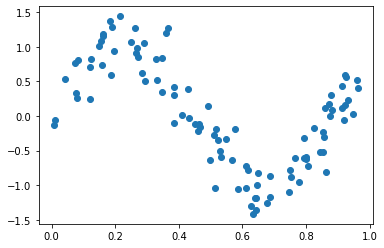

In [19]:
# Display the Matplotlib outputs within a cell's output. 
%matplotlib inline
import numpy as np
from matplotlib import pyplot

# Create a randomized scatterplot using matplotlib.
x = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.3, size=len(x))
y = np.sin(x * 7) + noise
pyplot.scatter(x, y)

### Altair

Another declarative visualization library for Python is Altair (see [Altair: Declarative Visualization in Python](https://altair-viz.github.io/)).

Try to zoom in/out and to hover over individual data points in the resulting plot below.

In [20]:
# Load an example dataset.
from vega_datasets import data
cars = data.cars()

# Plot the dataset, referencing dataframe column names.
import altair as alt
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
    ).interactive()

ModuleNotFoundError: No module named 'vega_datasets'

## Notebook Magics

The IPython and Colab environment support built-in magic commands called magics (see: [IPython - Magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html)).

In addition to default Python, these commands might be handy for example when it comes to interacting directly with the VM or the Notebook itself.



### Cell magics

Cell magics define a mode for a complete cell and are prefixed with **%%**.

Examples include:

*  **%%bash** or **%%sh**
* **%%html**
* **%%javascript**


In [ ]:
%%sh
echo "This is a shell script!"
# List all running VM processes.
ps -ef
echo "Done"

In [ ]:
# Embed custom HTML directly into a cell's output.
%%html
<marquee>HTML rocks</marquee>

### Line magics 

You can also make use of line magics which can be inserted anywhere at the beginning of a line inside a cell and need to be prefixed with **%**.

Examples include:


*   **%time** - display the required time to execute the current line
*   **%cd** - change the current working directory
*   **%pdb** - invoke an interactive Python debugger
* **%lsmagic** - list all available line magic and cell magic functions



For example, if you want to find out how long one specific line requires to be executed you can just prepend **%time**.


In [ ]:
n = 1000000
%time list1 = [i for i in range(n)]
print("")
%time list2 = [i for i in range(int(n/2))]

**Note:** Some line magics like **%time** can also be used for complete cells by writing **%%time**.

In [ ]:
%%time
n = 1000000
list1 = [i for i in range(n)]
list2 = [i for i in range(int(n/2))]

## Data handling

There are multiple ways to provide data to a Colabs's VM environment.
> **Note:** This section only applies to Colab.
> Jupyter has a file explorer and other options for data handling.

The options include:
*   Uploading files from the local file system.
* Connecting to Google Cloud Storage (explained below).
*   Connecting to Google Drive (see: [Snippets: Drive](https://colab.sandbox.google.com/notebooks/snippets/drive.ipynb); will be used in the next Colabs).

**Uploading files from the local file system**

In [21]:
# Snippet as provided in https://colab.research.google.com/notebooks/io.ipynb
# YOUR ACTION REQUIRED:
# Upload any test file to the target system.
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
# The file should now appear in the current working directory.
!pwd
!ls -l

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# A file can also be downloaded by using:
from google.colab import files
!touch test_file.txt
files.download('test_file.txt')

**Connecting to Google Cloud Storage**

[Google Cloud Storage](https://cloud.google.com/storage/?hl=de) (GCS) is a cloud file storage service with a RESTful API.

We can utilize it to store our own data or to access data provided by the following identifier:


```
gs://[BUCKET_NAME]/[OBJECT_NAME]
```

We'll use the data provided in **gs://amld-datasets/zoo_img** as can be seen below.

Before we can interact with the cloud environment, we need to grant permissions accordingly (also see [External data: Cloud Storage](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=S7c8WYyQdh5i)).

In [ ]:
from google.colab import auth
auth.authenticate_user()

List a subset of the contained files using the [gsutil tool](https://cloud.google.com/storage/docs/gsutil?hl=en).

In [ ]:
!gsutil ls gs://amld-datasets/zoo_img | head

Conveniently, TensorFlow natively supports multiple file systems such as:

*   GCS - Google Cloud Storage
*   HDFS - Hadoop
*   S3 - Amazon Simple Storage

An example for the GCS filesystem can be seen below.

In [ ]:
# Note: This cell hangs if you forget to call auth.authenticate_user() above.
tf.io.gfile.glob('gs://amld-datasets/zoo_img/*')[:10]

## Snippets

Finally, we can take a look at the snippets support in Colab.
> If you're using Jupyter please see [Jupyter contrib nbextensions - Snippets menu](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/nbextensions/snippets_menu/readme.html) as this is not natively supported.

Snippets are a way to quickly "bookmark" pieces of code or text that you might want to insert into specific cells.






In [ ]:
# YOUR ACTION REQUIRED:
# Explore existing snippets by going to the `Code snippets` section.
# Click on the <> button on the left sidebar to open the snippets.
# Alternatively, you can press `<CTRL><ALT><P>` (or `<COMMAND><OPTION><P>` for OS X).

In [22]:
from google.colab import snippets
# snippets.register('https://colab.research.google.com/drive/1OFSjEmqC-UC66xs-LR7-xmgkvxYTrAcN')

ModuleNotFoundError: No module named 'google.colab'

**Pro tip** : Maybe this is a good moment to create your own snippets and register them in settings. You can then start collecting often-used code and have it ready when you need it...

# ----- Optional part -----

## Custom line magic

You can also define your own line/cell magic in the following way.

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def mymagic(line_content, cell_content=None):
  print('line_content="%s" cell_content="%s"' % (line_content, cell_content))

In [ ]:
%mymagic Howdy Alice!

In [ ]:
%%mymagic simple question
Howdy Alice!
how are you?

## Forms

You can simplify cells by hiding their code and displaying a form instead.


**Note:** You can display or hide the code by double clicking the form which might be on the right side.

In [ ]:
#@title Execute me

# Hidden cell content.
print("Double click the cell to see its content.")


In [ ]:
# Form example mostly taken from "Adding form fields" Snippet.
#@title Example form
#@markdown Specify some test data and execute this cell.

string_type = 'test_string' #@param {type: "string"}
slider_value = 145  #@param {type: "slider", min: 100, max: 200}
number = 1339  #@param {type: "number"}
date = '2019-01-26'  #@param {type: "date"}
pick_me = "a"  #@param ['a', 'b', 'c']
#@markdown ---
print("Submitted data:")
print(string_type, slider_value, number, date, pick_me)

## Interactive debugging

An example of an IPython tool that you can utilize is the interactive debugger 
provided inside an IPython environment like Colab.

For instance, by using **%pdb on**, you can automatically trigger the debugger on exceptions to further analyze the state.

Some useful debugger commands are:

Description | Command
---|---
**h**(elp) | Display available commands
**p**(rint) `x` | Show content of object `x`
**w**(here) | Show current instruction pointer position
**q**(uit) | Leave the debugger

In [ ]:
# YOUR ACTION REQUIRED:
# Execute this cell, print the variable contents of a, b and exit the debugger.
%pdb on
a = 67069 / 47 - 0x5a
b = a - 0x539
#c = a / b  # Will throw an exception.

We'll not dive further into debugging but it's useful to know that this option exists.

Please see [Python Docs - pdb The Python Debugger](https://docs.python.org/2/library/pdb.html) for more information.

## A Word of Warning

While notebook environments like Colab/Jupyter provide many benefits, they also come with some caveats that you should be aware of.
One example is that you might quickly execute cells in a wrong order leading to unexpected behavior.

If you're interested in more examples feel free to take a look at:

[Youtube - I don't like notebooks by Joel Grus](https://www.youtube.com/watch?v=7jiPeIFXb6U) (duration ~56 minutes)